# Guided Capstone Project Report - Big Mountain Resort

## Overview
This notebook serves as a report for recommendations to Big Mountain Resort on how pricing can be adjusted to reflect the value of the resort's features compared to that of other resorts in Montana and across the US. 


### I. Code for Visualizations

This section loads data and defines the functions used in the visuals in this report. 

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version

In [2]:
expected_model_version = '1.0'
model_path = './models/ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
else:
    print("Expected model not found")

In [3]:
ski_data = pd.read_csv('./data/ski_data_step3_features.csv')
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']
model.fit(X, y)

X_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", model.X_columns]

In [4]:
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):  
    plt.subplots(figsize=figsize)
    if state is None:
        ski_x = ski_data[feat_name]
    else:
        ski_x = ski_data.loc[ski_data.state == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=big_mountain[feat_name].values, c='r', ls='--', alpha=0.8, label='Big Mountain')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for resorts in market share')
    plt.legend()

In [5]:
def predict_increase(features, deltas): 
    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()

In [6]:
expected_visitors = 350_000
runs_delta = [i for i in range(-1, -11, -1)]
price_deltas = [predict_increase(['Runs'], [delta]) for delta in runs_delta]
runs_closed = [-1 * x for x in runs_delta]

# Report Findings

In the initial analysis of Big Mountain Resort and how its ticket AdultWeekend ticket price compares to that of 302 other resorts in the US, we found that across all resorts, BMR's ticket price was not far from the average. However, in the state of Montana, Big Mountain Resort has the highest ski ticket price as seen in the second chart below.

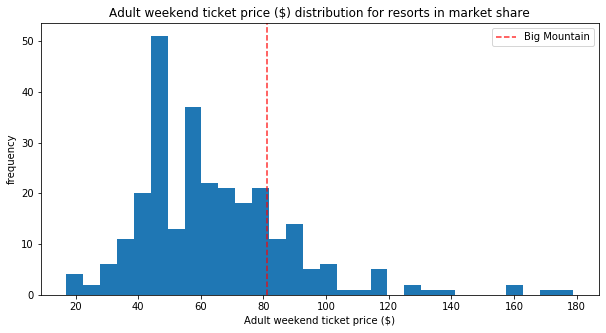

In [7]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($)')

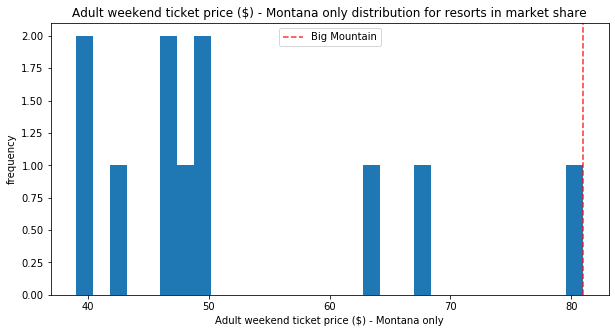

In [8]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($) - Montana only', state='Montana')

Part of the analysis was evaluating Big Mountain resort as it compared to other resorts in terms of features that contributed towards overall resort value. First, we identified what features correlated with ticket price. We then developed a model to determine what ticket price could be based on the overall value of the resort as well as model to weigh changes of these features and how those changes would impact ticket price.

Luckily for BMR, it has many of the features that make it a top valued resort. Even with that said, our model supported a ticket price for Big Mountain Resort of 94.22, where the actual price is 81.00! But recall, BMR is already the most expensive ski resort in Montana already.. 

Upon exploring the options provided by Big Mountain Resort leadership, two of the four possible options suggested that they would lead to an increase in revenue or a reduction in operating costs, each contributing to a greater net profit for the upcoming ski season.

## Report Recommendations

In using a pricing strategy so that ticket price reflects the value of the resort as it compares to the market as well as exploring options to reduce operational expenses, I have the following recommendations for Big Mountain Resort:

- Close the least used run at the resort. Removing this run should not have an impact on revenue althouth closing more could as seen in the graph below. 
- Increase ticket price by 1.99

The closing of the least used run would allow for less expenses and in return greater net profit for BMR over the next ski season. As well, BMR leadership could increase the price of the ski ticket because it can boast about it's many features at the resort, however I'd recommend only the slightest increase of 1.99 to not scare off customers that are already paying top dollar to visit BMR.


Additionally, depeding on how much of an expense it would be to invest in increasing the vertical drop feature (which strongly correlates to ticket price), I might suggest that BMR take action on another viable option proposed by BMR leadership:

- Add a run and ski lift, increasing the vertical drop by 150ft, and increase ticket price by 1.99

This would increase revenue by over 3.5M, which again depending on the operating costs, could possibly outweigh the operating costs of the new lift and run. 

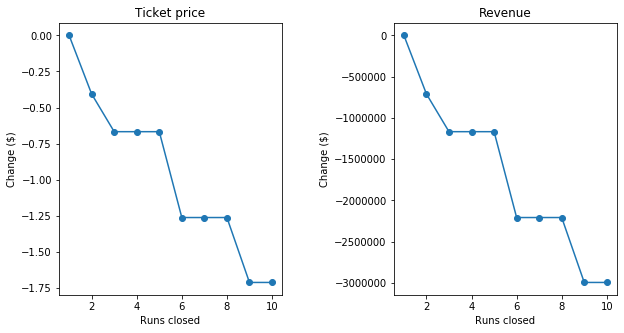

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
ax[0].plot(runs_closed, price_deltas, 'o-')
ax[0].set(xlabel='Runs closed', ylabel='Change ($)', title='Ticket price')
revenue_deltas = [5 * expected_visitors * y for y in price_deltas] #2
ax[1].plot(runs_closed, revenue_deltas, 'o-')
ax[1].set(xlabel='Runs closed', ylabel='Change ($)', title='Revenue');

## Summary

Overall, Big Mountain Resort has many features that it can add to in order to support an increased ticket price. As well, there are options to reduce operating costs to further increase profits. Keeping in mind what those operating costs look like, and perhaps what BMR has in terms of flexibility of investments, I would recommend that BMR begin with reducing costs and increasing ticket price by a slight amount to see a return on the upcoming ski season and then look to invest in it's features that will allow it to charge an even higher ticket price. 